In [1]:
#Prediction using Unsupervisod Machine Learning
# From the given ‘Iris’ dataset, predict the optimum number of clusters
# and represent it visually.

In [2]:
#Importing Libraries required for this task.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading data set as given data is in csv format.
# Importing data.

In [5]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
#cheking the number of rows and columns in the dataset and missing values in datase.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Finding the optimum number of clusters for k-means classification

In [10]:
x = df.iloc[:, :4].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pd.DataFrame({"Number of Clusters":range(1,11),"WCSS":wcss})

,Number of Clusters,WCSS
0,1,281831.544667
1,2,70581.380800
2,3,31320.711200
3,4,17762.657226
4,5,11423.238080
5,6,7909.530673
6,7,5881.448117
7,8,4562.780079
8,9,3579.720561
9,10,2968.491433


In [11]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'

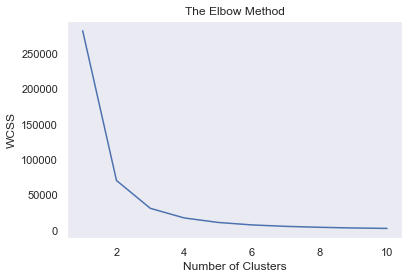

In [12]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [13]:
# Applying kmeans to the dataset / Creating the kmeans classifier

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [15]:
# Visualising the clusters - On the first two columns

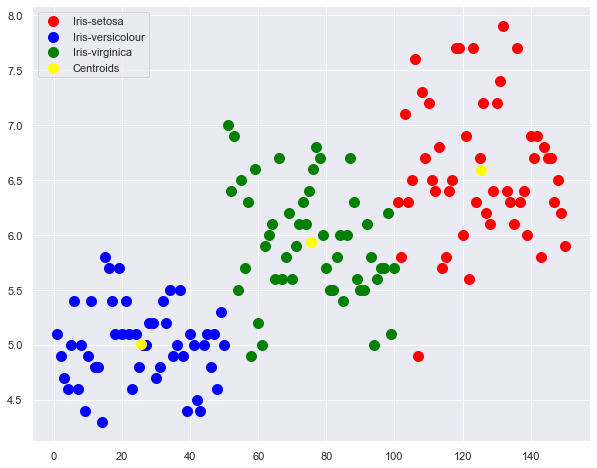

In [16]:

plt.figure(figsize=[10,8])
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], 
            s = 100, c = "red", label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [17]:
# Visualising the clusters in 3D

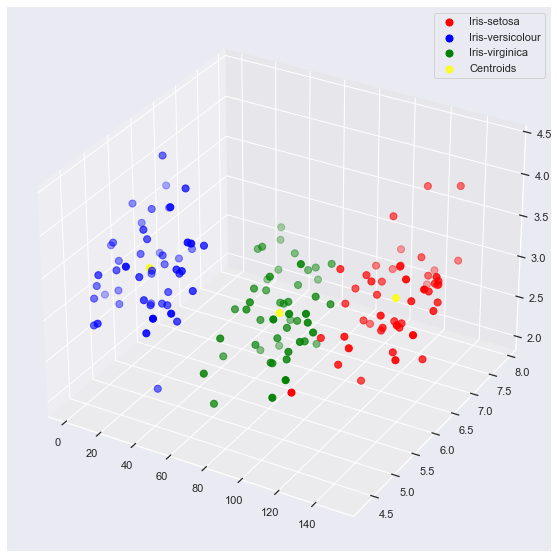

In [18]:

plt.figure(figsize=[10,10])
ax = plt.axes(projection ="3d")
ax.scatter3D(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], 
             s = 50, c = "red", label = 'Iris-setosa')
ax.scatter3D(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], 
             s = 50, c = 'blue', label = 'Iris-versicolour')
ax.scatter3D(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], 
             s = 50, c = 'green', label = 'Iris-virginica')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],
            s = 50, c = 'yellow', label = 'Centroids', alpha = 0.8)

plt.legend()
plt.show()